**1. (i) 다음은 Max Pooling 클래스의 순전파 코드이다. 14강 연습문제 1번에 다음 코드를 적용했을 때 밑줄친 4개의 값을 손으로 구하시오.**
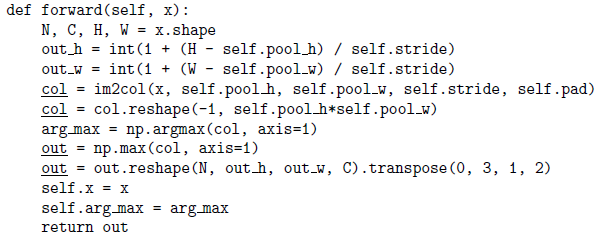

14강 연습문제 1번에서 데이터는
$$
X=
\begin{pmatrix}
\begin{pmatrix}
0&1&2 \\
3&7&4 \\
5&6&8
\end{pmatrix}
&
\begin{pmatrix}
8&0&1 \\
2&7&3 \\
4&5&6
\end{pmatrix} \\
\begin{pmatrix}
5&1&4 \\
2&0&3 \\
8&6&7
\end{pmatrix}
&
\begin{pmatrix}
5&6&7 \\
3&8&4 \\
0&1&2
\end{pmatrix}
\end{pmatrix}
$$
와 같이 주어져 있습니다.  
데이터에 im2col을 적용하면 합성곱할때 필터위치의 데이터를 flatten합니다.
$$
col=
\begin{pmatrix}
0&1&3&7&8&0&2&7\\
1&2&7&4&0&1&7&3\\
3&7&5&6&2&7&4&5\\
7&4&6&8&7&3&5&6\\
5&1&2&0&5&6&3&8\\
1&4&0&3&6&7&8&4\\
2&0&8&6&3&8&0&1\\
0&3&6&7&8&4&1&2
\end{pmatrix}
$$
열이 $2*2=4$가 되도록 reshape을 해서 채널을 분리합니다.
$$
col=
\begin{pmatrix}
0&1&3&7\\8&0&2&7\\
1&2&7&4\\0&1&7&3\\
3&7&5&6\\2&7&4&5\\
7&4&6&8\\7&3&5&6\\
5&1&2&0\\5&6&3&8\\
1&4&0&3\\6&7&8&4\\
2&0&8&6\\3&8&0&1\\
0&3&6&7\\8&4&1&2
\end{pmatrix}
$$
각 행에 대하여 최대값을 구합니다.
$$
out = [7, 8, 7, 7, 7, 7, 8, 7, 5, 8, 4, 8, 8, 8, 7, 8]
$$
N$\times$OH$\times$OW$\times$FN = 2$\times$2$\times$2$\times$2로 reshape을 합니다.  
$$
out=
\begin{pmatrix}
\begin{pmatrix}
7&8 \\
7&7
\end{pmatrix}
&
\begin{pmatrix}
7&7 \\
8&7
\end{pmatrix} \\
\begin{pmatrix}
5&8 \\
4&8
\end{pmatrix}
&
\begin{pmatrix}
8&8 \\
7&8
\end{pmatrix}
\end{pmatrix}
$$
transpose(0,3,1,2)를 적용합니다.  
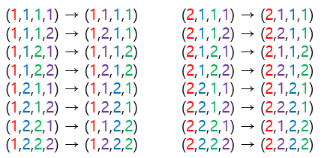
$$
out=
\begin{pmatrix}
\begin{pmatrix}
7&7 \\
7&8
\end{pmatrix}
&
\begin{pmatrix}
8&7 \\
7&7
\end{pmatrix} \\
\begin{pmatrix}
5&4 \\
8&7
\end{pmatrix}
&
\begin{pmatrix}
8&8 \\
8&8
\end{pmatrix}
\end{pmatrix}
$$
14강 연습문제 1번에서 구한 값과 같습니다.

**(ii) 코드로 검산하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.
import numpy as np
from common.util import im2col

stride=1
pad=0
pool_h=2
pool_w=2

x = np.array([[[[0,1,2],[3,7,4],[5,6,8]],[[8,0,1],[2,7,3],[4,5,6]]],[[[5,1,4],[2,0,3],[8,6,7]],[[5,6,7],[3,8,4],[0,1,2]]]])
pad

N, C, H, W = x.shape
out_h = int(1 + (H - pool_h) / stride)
out_w = int(1 + (W - pool_w) / stride)

In [2]:
col = im2col(x, pool_h, pool_w, stride, pad)
print(col)

[[0. 1. 3. 7. 8. 0. 2. 7.]
 [1. 2. 7. 4. 0. 1. 7. 3.]
 [3. 7. 5. 6. 2. 7. 4. 5.]
 [7. 4. 6. 8. 7. 3. 5. 6.]
 [5. 1. 2. 0. 5. 6. 3. 8.]
 [1. 4. 0. 3. 6. 7. 8. 4.]
 [2. 0. 8. 6. 3. 8. 0. 1.]
 [0. 3. 6. 7. 8. 4. 1. 2.]]


In [3]:
col = col.reshape(-1, pool_h*pool_w)
print(col)

[[0. 1. 3. 7.]
 [8. 0. 2. 7.]
 [1. 2. 7. 4.]
 [0. 1. 7. 3.]
 [3. 7. 5. 6.]
 [2. 7. 4. 5.]
 [7. 4. 6. 8.]
 [7. 3. 5. 6.]
 [5. 1. 2. 0.]
 [5. 6. 3. 8.]
 [1. 4. 0. 3.]
 [6. 7. 8. 4.]
 [2. 0. 8. 6.]
 [3. 8. 0. 1.]
 [0. 3. 6. 7.]
 [8. 4. 1. 2.]]


In [4]:
arg_max = np.argmax(col, axis=1)
out = np.max(col, axis=1)
print(out)

[7. 8. 7. 7. 7. 7. 8. 7. 5. 8. 4. 8. 8. 8. 7. 8.]


In [5]:
out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
print(out)

[[[[7. 7.]
   [7. 8.]]

  [[8. 7.]
   [7. 7.]]]


 [[[5. 4.]
   [8. 7.]]

  [[8. 8.]
   [8. 8.]]]]


**2. (i) (1번 문제 계속)
Max Pooling층으로 흘러들어온 미분이
$$
{\partial L \over \partial Y}=
\begin{pmatrix}
\begin{pmatrix}
1&1 \\
1&-1
\end{pmatrix}
&
\begin{pmatrix}
-1&1 \\
1&1
\end{pmatrix} \\
\begin{pmatrix}
1&2 \\
3&4
\end{pmatrix}
&
\begin{pmatrix}
1&1 \\
1&1
\end{pmatrix}
\end{pmatrix}
$$
일 때, 데이터에 대한 미분
$$
{\partial L \over \partial X}
$$
을 구하시오.**

흘러들어온 미분의 각항을 im2col할 때 최대가 일어나는 지점에 대입합니다.  
2개 이상일 경우는 더합니다.  
대입안하는 지점은 0으로 채워 넣습니다.  
$$
\begin{pmatrix}
\begin{pmatrix}
0&0&0 \\
0&1+1+1&0 \\
0&0&-1
\end{pmatrix}
&
\begin{pmatrix}
-1&0&0 \\
0&1+1+1&0 \\
0&0&0
\end{pmatrix} \\
\begin{pmatrix}
1&0&2 \\
0&0&0 \\
3&0&4
\end{pmatrix}
&
\begin{pmatrix}
0&0&0 \\
0&1+1+1+1&0 \\
0&0&0
\end{pmatrix}
\end{pmatrix}
=
\begin{pmatrix}
\begin{pmatrix}
0&0&0 \\
0&3&0 \\
0&0&-1
\end{pmatrix}
&
\begin{pmatrix}
-1&0&0 \\
0&3&0 \\
0&0&0
\end{pmatrix} \\
\begin{pmatrix}
1&0&2 \\
0&0&0 \\
3&0&4
\end{pmatrix}
&
\begin{pmatrix}
0&0&0 \\
0&4&0 \\
0&0&0
\end{pmatrix}
\end{pmatrix}
$$

**(ii) 코드로 검산하시오.**

In [6]:
from common.layers import Pooling

pooling_layer = Pooling(2,2)
pooling_layer.forward(x)

dout = np.array([[[[1,1],[1,-1]],[[-1,1],[1,1]]],[[[1,2],[3,4]],[[1,1],[1,1]]]])
dx = pooling_layer.backward(dout)
print(dx)

[[[[ 0.  0.  0.]
   [ 0.  3.  0.]
   [ 0.  0. -1.]]

  [[-1.  0.  0.]
   [ 0.  3.  0.]
   [ 0.  0.  0.]]]


 [[[ 1.  0.  2.]
   [ 0.  0.  0.]
   [ 3.  0.  4.]]

  [[ 0.  0.  0.]
   [ 0.  4.  0.]
   [ 0.  0.  0.]]]]
